In [1]:
!pip install kmodes

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [3]:
# Importar y leer el csv

df = pd.read_csv("bankmarketing.csv")

In [4]:
# Eliminamos variables númericas no interesantes

df = df.drop(['y', 'cons.price.idx', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent


##DATASET:

*   age (numeric)
*   job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
*   marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
*   education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
*   default: has credit in default? (categorical: 'no','yes','unknown')
*   housing: has housing loan? (categorical: 'no','yes','unknown')
*   loan: has personal loan? (categorical: 'no','yes','unknown')
contact: contact communication type (categorical: 'cellular','telephone')
*   month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
*   day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
*   poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



In [6]:
# Observamos los tipos de variables que hay en el dataset
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [7]:
# Obtenemos únicamente las categóricas

df_cat = df.select_dtypes(include=['object'])

In [8]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [9]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,17483,17483,17483,17483,17483,17483,17483,17483,17483,17482
unique,12,4,8,2,3,3,2,3,5,1
top,blue-collar,married,high.school,no,no,no,telephone,may,mon,nonexistent
freq,5177,11069,4261,12258,8776,14432,12915,7763,3619,17482


In [10]:
# Una práctica común es comprobar que no hayan variables nulas o null. Utilizar el método isnull de pandas
df_cat.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       1
dtype: int64

### ¿Qué hay que hacer ahora con los objetos?

## LABEL-ENCODING

In [11]:
from sklearn.preprocessing import LabelEncoder

# Instanciar el Label Encoder
le = LabelEncoder()

# Convertir cada columna categórica a numérica
for col in df_cat.columns:
    df_cat[col] = le.fit_transform(df_cat[col])

df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,2,1,0
1,7,1,3,1,0,0,1,2,1,0
2,7,1,3,0,2,0,1,2,1,0
3,0,1,1,0,0,0,1,2,1,0
4,7,1,3,0,0,2,1,2,1,0


## K-MODES Y ELBOW

In [12]:
from kmodes.kmodes import KModes

In [13]:
# Rango de valores k a probar
k_values = range(2, 7)
cost = []
sil = []

# Iteramos sobre cada valor de k
for k in k_values:
    # Instanciamos el algoritmo k-modes
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=1)

    # Ajustamos el modelo con los datos
    clusters = km.fit_predict(df_cat)
    cost.append(km.cost_)

    # Calculamos el silhouette score para los clusters
    silhouette_avg = silhouette_score(df_cat, clusters, metric='hamming')
    sil.append(silhouette_avg)
    print(f"Para k = {k}, el silhouette score es {silhouette_avg}")

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1776, cost: 66844.0
Para k = 2, el silhouette score es 0.1717225327650263
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1725, cost: 63599.0
Para k = 3, el silhouette score es 0.09971311859413948
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1800, cost: 61321.0
Run 1, iteration: 2/100, moves: 928, cost: 61321.0
Para k = 4, el silhouette score es 0.08453349691609365
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1

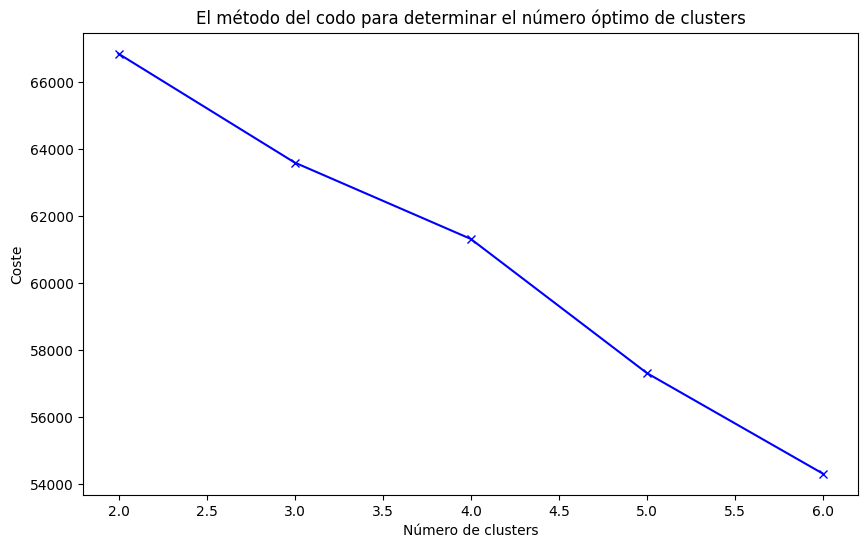

In [14]:
# Plotear el coste acorde con el número de clúster
plt.figure(figsize=(10, 6))
plt.plot(k_values, cost, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Coste')
plt.title('El método del codo para determinar el número óptimo de clusters')
plt.show()

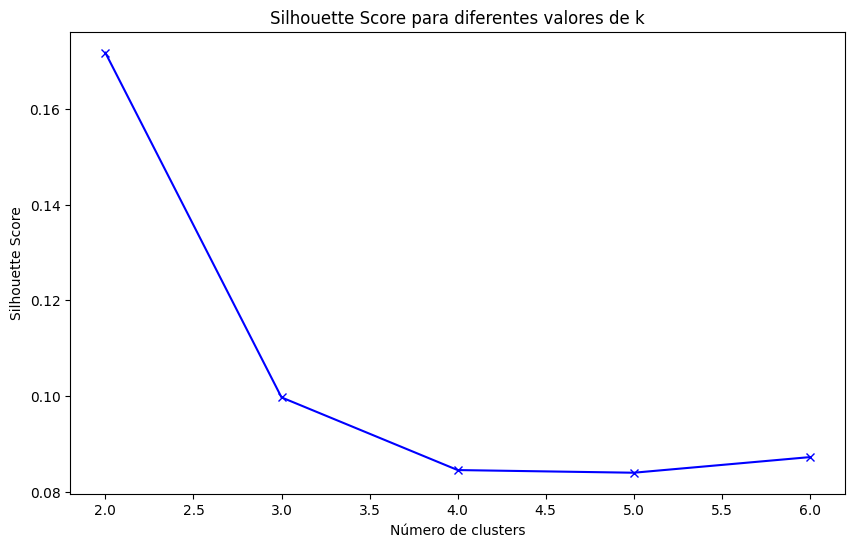

In [15]:
# Plotear el silhouette score
plt.figure(figsize=(10, 6))
plt.plot(k_values, sil, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k')
plt.show()

## MODELO

In [16]:
# Entrenamos con el número de clusters que creamos conveniente
km_cao = KModes(n_clusters=3, init='Cao', n_init=5, verbose=1)
model = km_cao.fit_predict(df_cat)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1725, cost: 63599.0


In [17]:
# Obtener los centroides en formato dataframe, recordad  asignar sus columnas

cluster_centroids_df = pd.DataFrame(km_cao.cluster_centroids_, columns=df_cat.columns)


In [19]:
cluster_centroids_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1,1,3,0,0,0,1,2,1,0
1,0,2,6,0,2,0,0,0,0,0
2,9,2,2,0,2,0,1,1,2,0


## UNIR AMBOS DATASETS

In [20]:
# Añadimos la columna 'cluster' al dataframe original
df['cluster'] = model

In [21]:
# Obtenemos los valores de cada cluster
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]

In [22]:
cluster_0.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cluster
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,0


In [23]:
cluster_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cluster
326,26,admin.,single,university.degree,no,yes,no,telephone,may,mon,231,3,999,0,nonexistent,1
432,30,self-employed,single,university.degree,no,yes,no,telephone,may,tue,262,1,999,0,nonexistent,1
494,32,admin.,single,university.degree,unknown,unknown,unknown,telephone,may,tue,49,1,999,0,nonexistent,1
497,35,admin.,divorced,university.degree,unknown,yes,no,telephone,may,tue,325,1,999,0,nonexistent,1
525,47,admin.,single,unknown,unknown,yes,no,telephone,may,tue,247,1,999,0,nonexistent,1


In [24]:
cluster_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cluster
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,2
59,25,technician,single,university.degree,no,yes,no,telephone,may,mon,174,1,999,0,nonexistent,2
158,43,technician,single,professional.course,no,yes,no,telephone,may,mon,186,2,999,0,nonexistent,2
210,36,student,single,basic.9y,no,yes,no,telephone,may,mon,256,1,999,0,nonexistent,2
294,37,technician,single,professional.course,no,yes,no,telephone,may,mon,98,2,999,0,nonexistent,2


In [25]:
cluster_0.describe()

,age,duration,campaign,pdays,previous,cluster
count,11150.000000,11150.000000,11150.000000,11150.0,11150.0,11150.0
mean,40.549955,259.878027,2.785381,999.0,0.0,0.0
std,8.996963,253.146155,3.147742,0.0,0.0,0.0
min,20.000000,0.000000,1.000000,999.0,0.0,0.0
25%,34.000000,109.000000,1.000000,999.0,0.0,0.0
50%,40.000000,186.000000,2.000000,999.0,0.0,0.0
75%,47.000000,321.000000,3.000000,999.0,0.0,0.0
max,61.000000,3643.000000,56.000000,999.0,0.0,0.0


* Job: Entrepreneur-blue-collar
* Marital: Mostly divorced
* Education: High-school
* Default: No credit
* Housing: Yes housing loan
* Loan: No personal loan




In [26]:
cluster_1.describe()

,age,duration,campaign,pdays,previous,cluster
count,4138.000000,4138.000000,4138.000000,4138.0,4138.0,4138.0
mean,37.546641,285.371194,2.796762,999.0,0.0,1.0
std,9.693284,280.385292,3.073276,0.0,0.0,0.0
min,19.000000,6.000000,1.000000,999.0,0.0,1.0
25%,30.000000,109.250000,1.000000,999.0,0.0,1.0
50%,35.000000,189.000000,2.000000,999.0,0.0,1.0
75%,45.000000,355.000000,3.000000,999.0,0.0,1.0
max,60.000000,2653.000000,43.000000,999.0,0.0,1.0


* Job: Mostly Admin/blue-collar
* Marital: Mostly divorced
* Education: Basic
* Default: Mostly no credit
* Housing: No housing loan
* Loan: No personal loan

In [27]:
cluster_2.describe()

,age,duration,campaign,pdays,previous,cluster
count,2195.000000,2195.000000,2195.000000,2195.0,2195.0,2195.0
mean,39.160820,251.150342,2.890661,999.0,0.0,2.0
std,9.358412,271.623406,3.343844,0.0,0.0,0.0
min,20.000000,4.000000,1.000000,999.0,0.0,2.0
25%,32.000000,91.000000,1.000000,999.0,0.0,2.0
50%,38.000000,170.000000,2.000000,999.0,0.0,2.0
75%,46.000000,306.500000,3.000000,999.0,0.0,2.0
max,60.000000,3183.000000,37.000000,999.0,0.0,2.0


## Mejoremos el modelo


Nos quedamos con las variables que vemos que ofrecen diferencias para luego comparar con la edad.

In [28]:
# Filtramos las variables de interés
df2 = df[['job', 'education', 'loan']]

In [29]:
df2.head()

,job,education,loan
0,housemaid,basic.4y,no
1,services,high.school,no
2,services,high.school,no
3,admin.,basic.6y,no
4,services,high.school,yes


In [30]:
# Convertimos las variables categórica a numéricas
for col in df2.columns:
    df2[col] = le.fit_transform(df2[col])

In [31]:
from kmodes.kmodes import KModes

In [32]:
# Rango de valores k a probar
k_values2 = range(2, 10)
cost2 = []
sil2 = []

# Tarea: cost2 es para el elbow, sil2 para el silhouette method

# Iteramos sobre cada valor de k
for k in k_values2:
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=1)
    clusters = km.fit_predict(df2)
    cost2.append(km.cost_)
    silhouette_avg = silhouette_score(df2, clusters, metric='hamming')
    sil2.append(silhouette_avg)
    print(f"Para k = {k}, el silhouette score es {silhouette_avg}")

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22550.0
Para k = 2, el silhouette score es 0.21518123234322775
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1158, cost: 19352.0
Para k = 3, el silhouette score es 0.26182552824806615
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1158, cost: 18157.0
Para k = 4, el silhouette score es 0.23905734730006228
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1128, cost: 17456.0
Run 1,

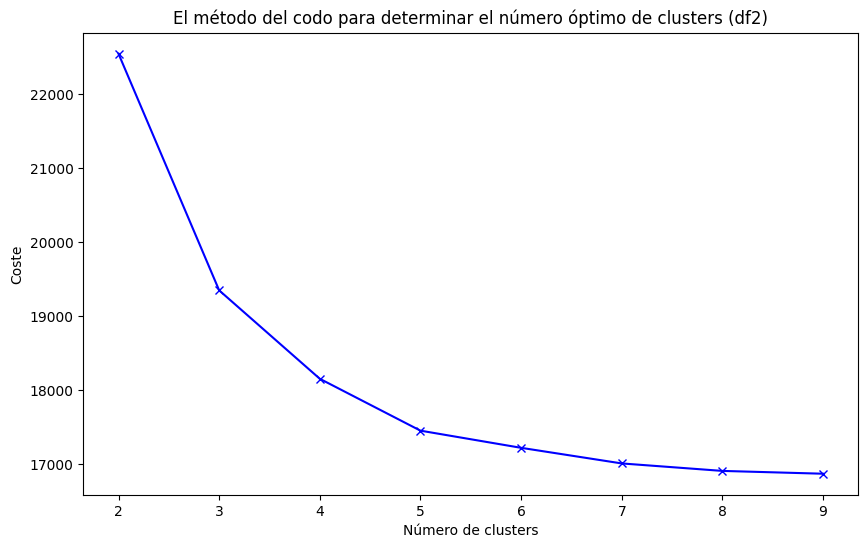

In [33]:
# Plotear el coste
plt.figure(figsize=(10, 6))
plt.plot(k_values2, cost2, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Coste')
plt.title('El método del codo para determinar el número óptimo de clusters (df2)')
plt.show()

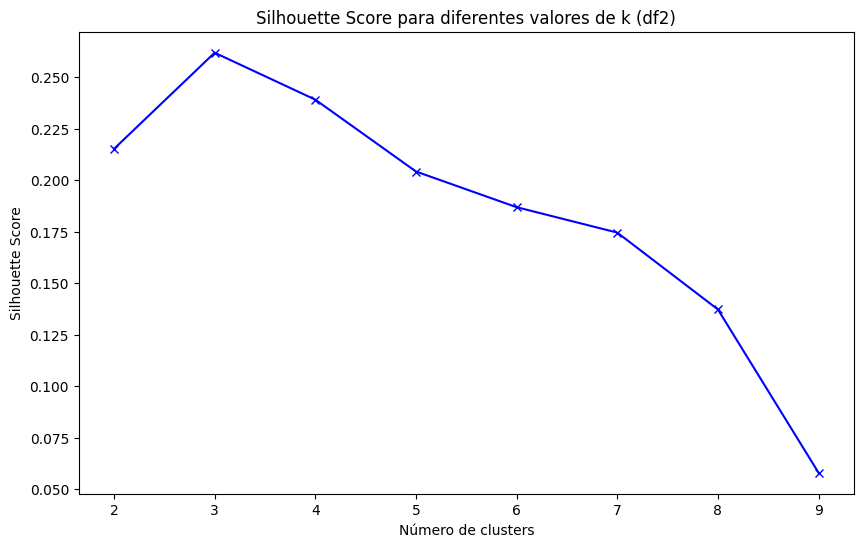

In [35]:
# Plotear el silhouette score
plt.figure(figsize=(10, 6))
plt.plot(k_values2, sil2, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k (df2)')
plt.show()

In [36]:
# Tarea, cuantos clusters salen?
km_cao2 = KModes(n_clusters=3, init='Cao', n_init=5, verbose=1)
model2 = km_cao2.fit_predict(df2)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1158, cost: 19352.0


In [37]:
# Añadimos la columna cluster
df2['cluster'] = model2

In [38]:
# Cuantas muestras por cluster
df2['cluster'].value_counts()

cluster
0    11078
1     4386
2     2019
Name: count, dtype: int64

In [ ]:
# Obtenemos los cluster

In [39]:
df['cluster'] = df2['cluster']

education_num    0
housing_num      0
age              0
dtype: int64


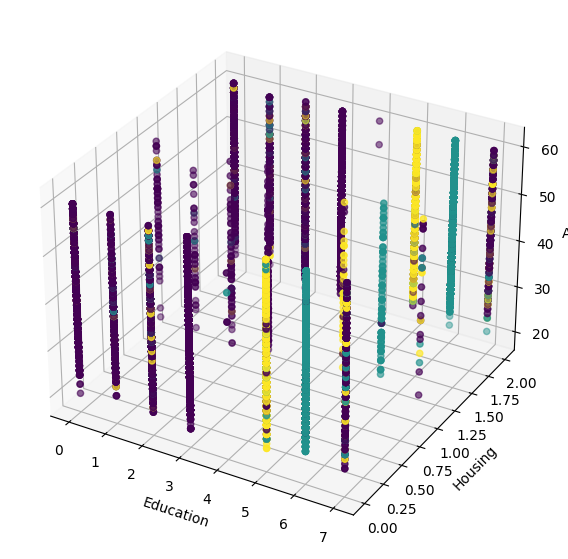

In [42]:
# Asegurarse de que todas las variables categóricas se conviertan a numéricas
df['education_num'] = le.fit_transform(df['education'])
df['housing_num'] = le.fit_transform(df['housing'])
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Asegurarse de que 'age' sea numérico

# Verificar que no haya valores NaN después de la conversión
print(df[['education_num', 'housing_num', 'age']].isnull().sum())

# Eliminar filas con valores NaN si existen
df = df.dropna(subset=['education_num', 'housing_num', 'age'])

# Ploteamos 3D distintas variables para analizar el clustering
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['education_num']
y = df['housing_num']
z = df['age']
ax.scatter(x, y, z, c=df['cluster'], cmap='viridis', marker='o')

ax.set_xlabel('Education')
ax.set_ylabel('Housing')
ax.set_zlabel('Age')

plt.show()

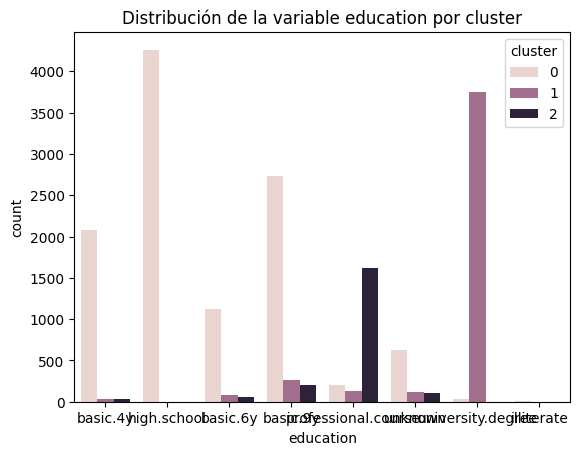

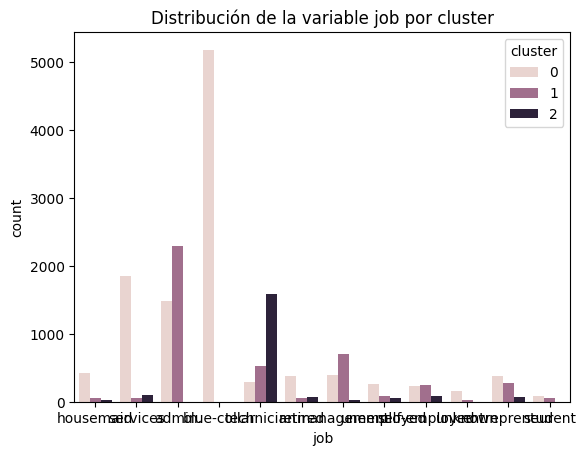

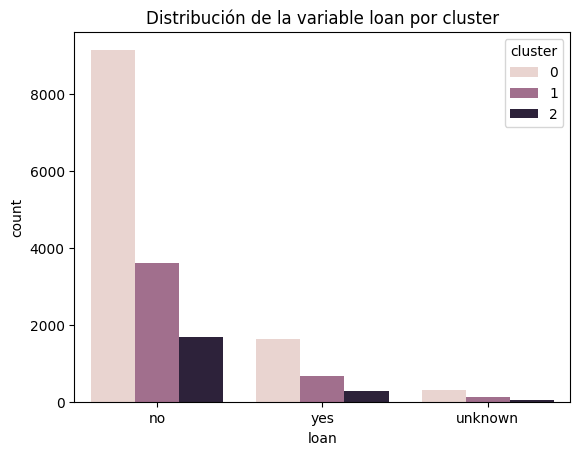

In [43]:
# Plotead countplots para ver cuantas muestras hay en cada clase por característica, utilizad countplot, mirad cada una de las características, por ejemplo, education
sns.countplot(x='education', hue='cluster', data=df)
plt.title('Distribución de la variable education por cluster')
plt.show()

sns.countplot(x='job', hue='cluster', data=df)
plt.title('Distribución de la variable job por cluster')
plt.show()

sns.countplot(x='loan', hue='cluster', data=df)
plt.title('Distribución de la variable loan por cluster')
plt.show()